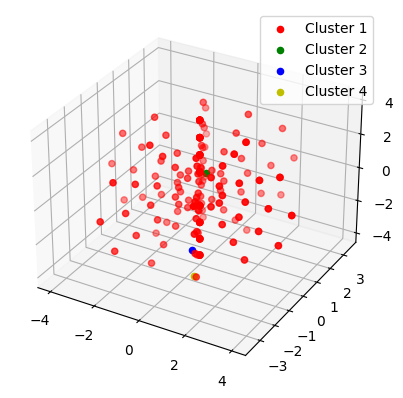

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_spherical_layers_data(n_per_layer, layers):
    points = []
    for layer in range(1, layers+1):
        phi = np.linspace(0, np.pi, n_per_layer)  # 极角范围
        theta = np.linspace(0, 2 * np.pi, n_per_layer)  # 方位角范围

        phi, theta = np.meshgrid(phi, theta)
        
        r = layer  # 设置不同层次的半径
        x = r * np.sin(phi) * np.cos(theta)
        y = r * np.sin(phi) * np.sin(theta)
        z = r * np.cos(phi)

        layer_points = np.vstack((x.ravel(), y.ravel(), z.ravel())).T
        points.append(layer_points)

    return np.vstack(points)

def hierarchical_clustering(x):
    n = x.shape[0]
    clusters = [{i} for i in range(n)]  # 初始时每个点为一个簇

    while len(clusters) > 4:  # 聚类层数为 4
        min_dist = float('inf')
        merge_i, merge_j = -1, -1

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                # 计算两个簇之间的最短距离
                dist = min([np.linalg.norm(x[p1] - x[p2]) for p1 in clusters[i] for p2 in clusters[j]])

                if dist < min_dist:
                    min_dist = dist
                    merge_i, merge_j = i, j

        # 合并最近的两个簇
        clusters[merge_i] = clusters[merge_i].union(clusters[merge_j])
        del clusters[merge_j]

    return clusters  # 返回最终形成的簇

# 生成具有不同层次结构的数据
n_per_layer = 4
layers = 4
x = generate_spherical_layers_data(n_per_layer, layers)

# 运行层次聚类
result = hierarchical_clustering(x)

# 只取四个簇进行可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']

for i, cluster in enumerate(result[:4]):
    cluster_points = np.array([x[j] for j in cluster])
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=colors[i], label=f'Cluster {i+1}')

plt.legend()
plt.show()
